In [4]:
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import seaborn as sns
#import pandas_profiling 
import seaborn as sns


from datetime import datetime

import statsmodels.api as sm
from sklearn import metrics
#from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
from sklearn import linear_model
from sklearn import model_selection

In [1]:
%pylab inline
# для графиков

Populating the interactive namespace from numpy and matplotlib


### предварительная обрабока данных

In [7]:
train = pd.read_csv('train.csv')
feature = pd.read_csv('features.csv')
test = pd.read_csv('test.csv')
stores = pd.read_csv('stores.csv')


# For Output_excel file...
writer=pd.ExcelWriter('Walmart Store Sales Prediction output.xlsx', engine='xlsxwriter')

In [8]:
train.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,26,92,2011-08-26,87235.57,False,61.10,3.796,NaN,NaN,NaN,NaN,NaN,136.213613,7.767,A,152513
1,34,22,2011-03-25,5945.97,False,53.11,3.480,NaN,NaN,NaN,NaN,NaN,128.616064,10.398,A,158114
2,21,28,2010-12-03,1219.89,False,50.43,2.708,NaN,NaN,NaN,NaN,NaN,211.265543,8.163,B,140167


In [9]:
test.head(3)

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,28,40,2012-01-06,False,50.43,3.599,5155.86,19549.51,218.29,636.73,5218.50,130.157516,12.187,A,206302
1,18,93,2012-03-09,False,38.10,3.876,7410.18,368.19,25.46,1852.39,2332.07,137.506690,8.075,B,120653
2,38,4,2011-05-27,False,76.67,4.087,NaN,NaN,NaN,NaN,NaN,129.062355,13.736,C,39690


In [10]:
stores.head(3)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392


In [11]:
feature.head(3)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False


In [10]:
#train_labels = train['Weekly_Sales'].values # вырезаем столбец с меткой

In [11]:
#визуализируем целевую переменную
#pylab.figure(figsize = (16, 4))

#pylab.subplot(1,2,1)
#pylab.hist(train_labels)
#pylab.title('train data')


In [12]:
feature.tail(3)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


##### большую часть времени продается не более 20000

In [13]:
train_bt = pd.merge(train,stores) #объединение
train = pd.merge(train_bt,feature)
#
test_bt = pd.merge(test,stores)
test= pd.merge(test_bt,feature)
#dataset = pd.merge(test,train)

In [14]:
train_bt.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,26,92,2011-08-26,87235.57,False,61.10,3.796,NaN,NaN,NaN,NaN,NaN,136.213613,7.767,A,152513
1,26,27,2012-04-06,774.32,False,33.35,3.957,8674.08,NaN,33.85,1128.16,3852.6,137.797097,7.489,A,152513
2,26,7,2012-04-13,16045.86,False,36.90,4.025,3766.78,2941.14,24.34,1103.96,2536.7,137.868000,7.489,A,152513
3,26,41,2011-04-01,943.50,False,22.99,3.638,NaN,NaN,NaN,NaN,NaN,134.068258,7.818,A,152513
4,26,45,2010-04-23,34.41,False,39.68,2.895,NaN,NaN,NaN,NaN,NaN,132.022667,8.512,A,152513


In [15]:
train.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,26,92,2011-08-26,87235.57,False,61.1,3.796,NaN,NaN,NaN,NaN,NaN,136.213613,7.767,A,152513
1,26,36,2011-08-26,605.27,False,61.1,3.796,NaN,NaN,NaN,NaN,NaN,136.213613,7.767,A,152513


In [16]:
print (train.info())
print ("*"*30)
print (test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259583 entries, 0 to 259582
Data columns (total 16 columns):
Store           259583 non-null int64
Dept            259583 non-null int64
Date            259583 non-null object
Weekly_Sales    259583 non-null float64
IsHoliday       259583 non-null bool
Temperature     259583 non-null float64
Fuel_Price      259583 non-null float64
MarkDown1       88314 non-null float64
MarkDown2       65022 non-null float64
MarkDown3       80703 non-null float64
MarkDown4       78849 non-null float64
MarkDown5       88750 non-null float64
CPI             259583 non-null float64
Unemployment    259583 non-null float64
Type            259583 non-null object
Size            259583 non-null int64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 31.9+ MB
None
******************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 127654 entries, 0 to 127653
Data columns (total 15 columns):
Store           127654 non-null int64
Dept   

### Описание данных

#### Training Data

In [17]:
numeric_var_train=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_train=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['object']]
# Train Numerical Data
train_num=train[numeric_var_train]

# Train Categorical Data
train_cat=train[cat_var_train]
print (numeric_var_train)
print (cat_var_train)

['Store', 'Dept', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size']
['Date', 'Type']


In [18]:
# Creating Data audit Report
# Use a general function that returns multiple values    
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])
 
num_summary=train_num.apply(lambda x: var_summary(x)).T
num_summary.to_excel(writer,'Numeric_variable Summary',index=True)
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Store,259583.0,0.0,5.802793e+06,22.354287,22.000000,12.699773,1.612842e+02,1.000,1.000000,2.00000,5.000000,12.000000,22.000000,33.000000,40.0000,43.00000,45.000000,45.000000
Dept,259583.0,0.0,1.149726e+07,44.291263,38.000000,30.522004,9.315928e+02,1.000,1.000000,4.00000,7.000000,18.000000,38.000000,74.000000,92.0000,95.00000,98.000000,99.000000
Weekly_Sales,259583.0,0.0,4.109135e+09,15829.751964,7524.390000,22550.162505,5.085098e+08,-4988.940,5.000000,58.07500,282.906000,2037.335000,7524.390000,19984.865000,42403.7920,60680.87700,106012.384200,693099.360000
Temperature,259583.0,0.0,1.558308e+07,60.031201,62.210000,18.722709,3.505398e+02,-2.060,17.910000,26.60000,33.200000,46.490000,62.210000,74.480000,83.6300,87.52000,92.890000,100.140000
Fuel_Price,259583.0,0.0,8.680161e+05,3.343887,3.413000,0.455219,2.072247e-01,2.472,2.572000,2.64400,2.720000,2.919000,3.413000,3.722000,3.9030,4.02100,4.202000,4.468000
MarkDown1,88314.0,171269.0,6.301722e+08,7135.586985,5251.980000,8060.500720,6.497167e+07,0.270,16.490000,128.46000,370.990000,2155.730000,5251.980000,9104.000000,15092.8700,21621.16000,41059.390000,78124.500000
MarkDown2,65022.0,194561.0,2.149694e+08,3306.103092,190.490000,9327.930801,8.701029e+07,-265.760,-0.600000,1.91000,6.570000,37.200000,190.490000,1958.520000,8549.7400,16590.75000,50438.170000,104519.540000
MarkDown3,80703.0,178880.0,1.131703e+08,1402.306432,23.990000,9508.624982,9.041395e+07,-29.100,0.060000,0.60000,1.600000,4.900000,23.990000,101.000000,394.1800,1030.53000,63143.290000,141630.610000
MarkDown4,78849.0,180734.0,2.615439e+08,3317.021778,1450.130000,6100.309419,3.721378e+07,0.220,4.000000,28.76000,104.180000,499.000000,1450.130000,3498.460000,7731.0900,12823.70000,35364.080000,57817.560000
MarkDown5,88750.0,170833.0,3.975129e+08,4479.018208,3312.670000,4985.482194,2.485503e+07,135.160,353.190000,725.10000,1064.560000,1844.030000,3312.670000,5516.140000,8294.4700,10920.89000,25107.850000,85851.870000


In [19]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=train_cat.apply(lambda x: cat_summary(x))
cat_summary

,Date,Type
N,259583,259583
NMISS,0,0
ColumnsNames,2010-09-24 2015 2011-03-25 2013 2011-02-...,A 130394 B 102500 C 26689 Name: Type...


#### Testing Data

In [20]:
numeric_var_test=[key for key in dict(test.dtypes) if dict(test.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_test=[key for key in dict(test.dtypes) if dict(test.dtypes)[key] in ['object']]
# Train Numerical Data
test_num=test[numeric_var_test]

# Train Categorical Data
test_cat=test[cat_var_test]
print (numeric_var_test)
print (cat_var_test)

['Store', 'Dept', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size']
['Date', 'Type']


In [21]:
num_summary=test_num.apply(lambda x: var_summary(x)).T
#num_summary.to_excel(writer,'Numeric_variable Summary',index=True)
num_summary.head()

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Store,127654.0,0.0,2.856899e+06,22.380019,22.000,12.701656,1.613321e+02,1.000,1.0000,3.0000,5.00,12.000,22.000,33.000,40.000,43.000,45.000,45.000
Dept,127654.0,0.0,5.642430e+06,44.200965,37.000,30.474151,9.286739e+02,1.000,1.0000,4.0000,7.00,18.000,37.000,72.000,91.000,95.000,98.000,99.000
Temperature,127654.0,0.0,7.652403e+06,59.946443,62.070,18.732012,3.508883e+02,-2.060,17.9500,26.7300,33.20,46.200,62.070,74.440,83.610,87.470,93.190,100.140
Fuel_Price,127654.0,0.0,4.270716e+05,3.345540,3.415,0.454983,2.070096e-01,2.472,2.5650,2.6420,2.72,2.921,3.415,3.723,3.903,4.021,4.202,4.468
MarkDown1,43962.0,83692.0,3.135166e+08,7131.535897,5204.680,8105.446088,6.569826e+07,0.270,17.1076,128.4505,367.23,2143.540,5204.680,9082.610,15098.610,22242.790,41059.390,78124.500


In [22]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=test_cat.apply(lambda x: cat_summary(x))
cat_summary

,Date,Type
N,127654,127654
NMISS,0,0
ColumnsNames,2011-02-11 992 2011-01-28 992 2010-05-07...,"A 63877 B 50563 C 13214 Name: Type, d..."


In [23]:
#вычисление попарной корреляции
train_corr=pd.DataFrame(train.corr())
train_corr.to_excel(writer,'Train_Data Corr',index=True)
train_corr.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
Store,1.000000,0.020939,-0.084196,0.005696,-0.054805,0.054551,-0.134835,-0.029652,-0.032270,-0.015989,-0.071837,-0.199941,0.218446,-0.173801
Dept,0.020939,1.000000,0.149138,0.000114,0.003882,0.002152,0.001229,-0.001657,0.001432,0.006672,-0.001137,-0.005508,0.008562,-0.001729
Weekly_Sales,-0.084196,0.149138,1.000000,0.011264,-0.003032,-0.000763,0.093809,0.024814,0.054854,0.051198,0.101221,-0.020567,-0.024269,0.243211
IsHoliday,0.005696,0.000114,0.011264,1.000000,-0.154833,-0.072392,-0.035943,0.331363,0.426828,0.005309,-0.057653,-0.010736,0.012237,-0.001839
Temperature,-0.054805,0.003882,-0.003032,-0.154833,1.000000,0.134204,-0.027976,-0.321841,-0.091123,-0.065778,-0.043400,0.194557,0.106403,-0.057976


In [24]:
test_corr=pd.DataFrame(test.corr())
#test_corr.to_excel(writer,'Test_Data Corr',index=True)
test_corr.head()

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
Store,1.000000,0.030022,0.003442,-0.052993,0.054874,-0.133886,-0.039971,-0.034979,-0.015781,-0.083758,-0.197295,0.217433,-0.177057
Dept,0.030022,1.000000,0.002845,0.003406,0.005934,-0.010755,0.003218,0.002337,-0.000293,0.000181,-0.010141,0.007489,-0.007951
IsHoliday,0.003442,0.002845,1.000000,-0.153701,-0.075435,-0.044216,0.329152,0.440761,-0.007967,-0.061240,-0.006867,0.006267,0.002707
Temperature,-0.052993,0.003406,-0.153701,1.000000,0.141050,-0.034061,-0.326392,-0.088039,-0.065926,-0.041082,0.198919,0.104684,-0.058353
Fuel_Price,0.054874,0.005934,-0.075435,0.141050,1.000000,0.058382,-0.228872,-0.105826,-0.044118,-0.127512,-0.149484,-0.013674,-0.005536


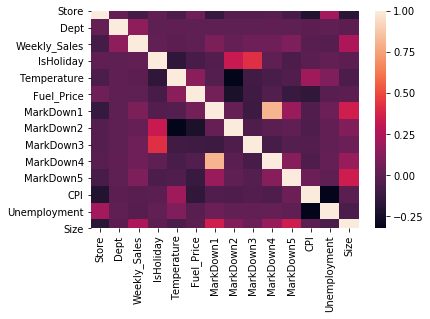

In [25]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(train.corr())

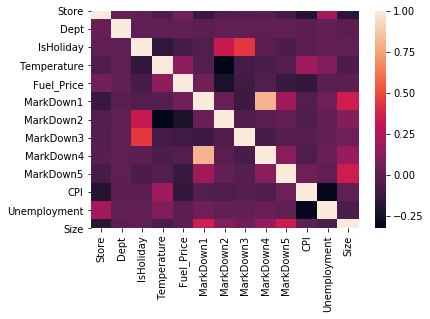

In [26]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(test.corr())

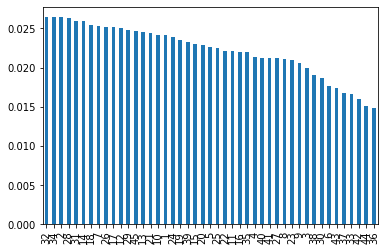

In [27]:
train['Store'].value_counts(normalize=True).plot(kind = 'bar',fig=(4,5))

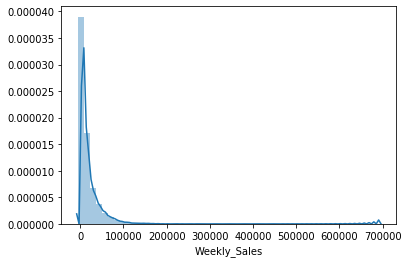

In [28]:
sns.distplot(train.Weekly_Sales)

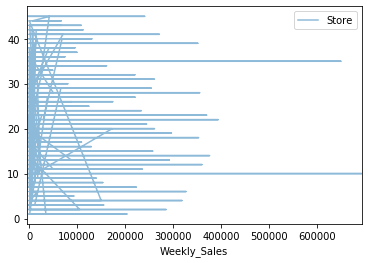

In [29]:
train.plot(kind='line', x='Weekly_Sales', y='Store', alpha=0.5)

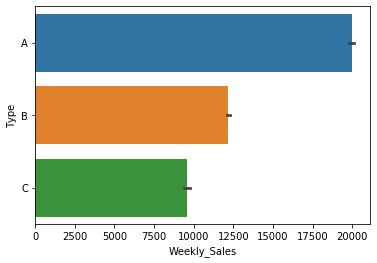

In [30]:
#tips = sns.load_dataset('train')
sns.barplot(x=train["Weekly_Sales"],y=train["Type"])

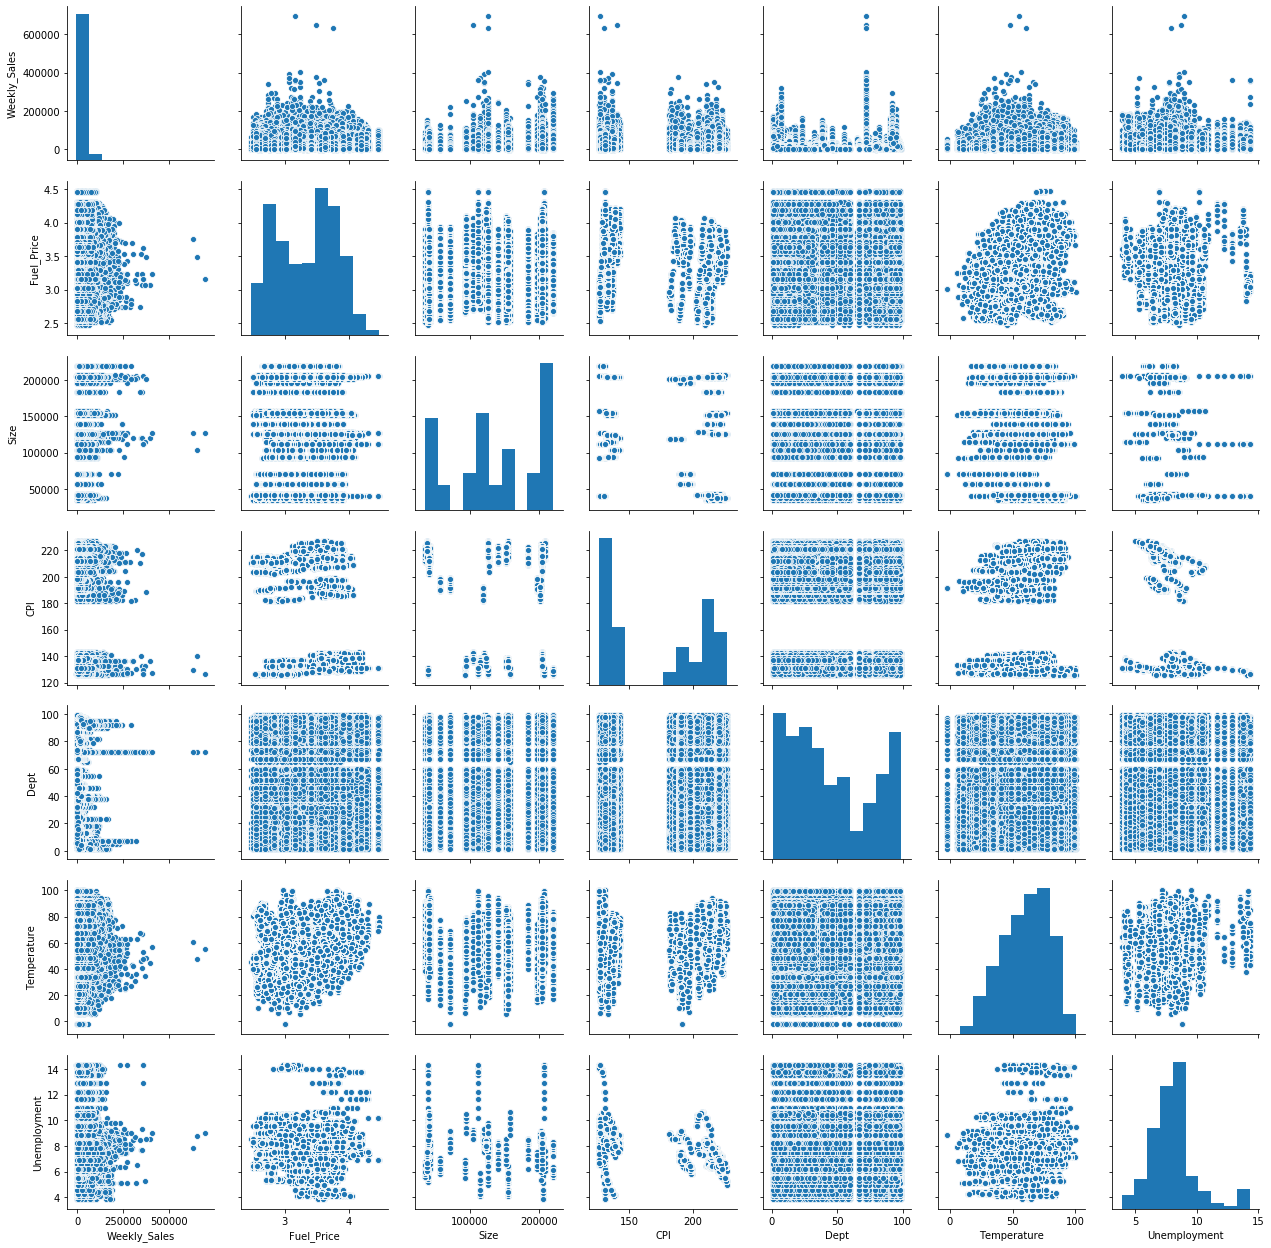

In [31]:
sns.pairplot(train, vars=['Weekly_Sales', 'Fuel_Price', 'Size', 'CPI', 'Dept', 'Temperature', 'Unemployment'])

In [32]:
#sns.pairplot(test, vars=[ 'Fuel_Price', 'Size', 'CPI', 'Dept', 'Temperature', 'Unemployment'])

In [33]:
#train.plot(kind='line', x='Dept', y='Weekly_Sales', alpha=1.5,fig=(4,5))

In [31]:
#пропущенные значения
print (train.isnull().sum())
print ("*"*30)
print (test.isnull().sum())

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       171269
MarkDown2       194561
MarkDown3       178880
MarkDown4       180734
MarkDown5       170833
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64
******************************
Store               0
Dept                0
Date                0
IsHoliday           0
Temperature         0
Fuel_Price          0
MarkDown1       83692
MarkDown2       95336
MarkDown3       87523
MarkDown4       88398
MarkDown5       83481
CPI                 0
Unemployment        0
Type                0
Size                0
dtype: int64


In [32]:
test['CPI']=test.groupby(['Dept'])['CPI'].transform(lambda x: x.fillna(x.mean()))
test['Unemployment']=test.groupby(['Dept'])['Unemployment'].transform(lambda x: x.fillna(x.mean()))

In [33]:
train=train.fillna(0)
test=test.fillna(0)

In [34]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,26,92,2011-08-26,87235.57,False,61.1,3.796,0.0,0.0,0.0,0.0,0.0,136.213613,7.767,A,152513
1,26,36,2011-08-26,605.27,False,61.1,3.796,0.0,0.0,0.0,0.0,0.0,136.213613,7.767,A,152513
2,26,19,2011-08-26,2007.95,False,61.1,3.796,0.0,0.0,0.0,0.0,0.0,136.213613,7.767,A,152513
3,26,55,2011-08-26,5173.58,False,61.1,3.796,0.0,0.0,0.0,0.0,0.0,136.213613,7.767,A,152513
4,26,24,2011-08-26,6000.10,False,61.1,3.796,0.0,0.0,0.0,0.0,0.0,136.213613,7.767,A,152513


In [35]:
test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,28,40,2012-01-06,False,50.43,3.599,5155.86,19549.51,218.29,636.73,5218.5,130.157516,12.187,A,206302
1,28,32,2012-01-06,False,50.43,3.599,5155.86,19549.51,218.29,636.73,5218.5,130.157516,12.187,A,206302
2,28,85,2012-01-06,False,50.43,3.599,5155.86,19549.51,218.29,636.73,5218.5,130.157516,12.187,A,206302
3,28,94,2012-01-06,False,50.43,3.599,5155.86,19549.51,218.29,636.73,5218.5,130.157516,12.187,A,206302
4,28,3,2012-01-06,False,50.43,3.599,5155.86,19549.51,218.29,636.73,5218.5,130.157516,12.187,A,206302


In [36]:
print (train.isnull().sum())
print ("*"*30)
print (test.isnull().sum())

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64
******************************
Store           0
Dept            0
Date            0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64


#### обработка выбросов

In [37]:
train.Weekly_Sales=np.where(train.Weekly_Sales>100000, 100000,train.Weekly_Sales)

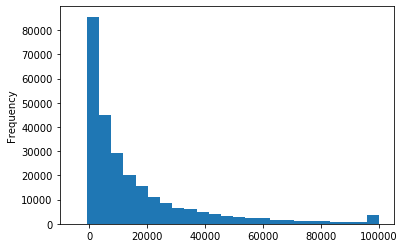

In [38]:
train.Weekly_Sales.plot.hist(bins=25)

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259583 entries, 0 to 259582
Data columns (total 16 columns):
Store           259583 non-null int64
Dept            259583 non-null int64
Date            259583 non-null object
Weekly_Sales    259583 non-null float64
IsHoliday       259583 non-null bool
Temperature     259583 non-null float64
Fuel_Price      259583 non-null float64
MarkDown1       259583 non-null float64
MarkDown2       259583 non-null float64
MarkDown3       259583 non-null float64
MarkDown4       259583 non-null float64
MarkDown5       259583 non-null float64
CPI             259583 non-null float64
Unemployment    259583 non-null float64
Type            259583 non-null object
Size            259583 non-null int64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 41.9+ MB


In [40]:
#замена типа для Date
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [41]:
# Extract date features Извлечь особенности даты
train['Date_dayofweek'] =train['Date'].dt.dayofweek
train['Date_month'] =train['Date'].dt.month 
train['Date_year'] =train['Date'].dt.year
train['Date_day'] =train['Date'].dt.day 

test['Date_dayofweek'] =test['Date'].dt.dayofweek
test['Date_month'] =test['Date'].dt.month 
test['Date_year'] =test['Date'].dt.year
test['Date_day'] =test['Date'].dt.day

In [42]:
print (train.Type.value_counts())
print ("*"*30)
print (test.Type.value_counts())

A    130394
B    102500
C     26689
Name: Type, dtype: int64
******************************
A    63877
B    50563
C    13214
Name: Type, dtype: int64


In [43]:
print (train.IsHoliday.value_counts())
print ("*"*30)
print (test.IsHoliday.value_counts())

False    241261
True      18322
Name: IsHoliday, dtype: int64
******************************
False    118561
True       9093
Name: IsHoliday, dtype: int64


In [44]:
train_test_data = [train, test]

##### Преобразование категориальной переменной 'Type' в числовую переменную Для A = 1, B = 2, C = 3

In [45]:
type_mapping = {"A": 1, "B": 2, "C": 3}
for dataset in train_test_data:
    dataset['Type'] = dataset['Type'].map(type_mapping)

#### Преобразование категориальной переменной IsHoliday в числовую переменную

In [46]:
type_mapping = {False: 0, True: 1}
for dataset in train_test_data:
    dataset['IsHoliday'] = dataset['IsHoliday'].map(type_mapping)

##### Создание дополнительной праздничной переменной. Если на этой неделе наступает дополнительный выходной, то 1 (= Да), иначе 2 (= Нет)

In [47]:
#train['Super_Bowl'] = np.where((train['Date']==datetime(2010, 2, 12)) | (train['Date']==datetime(2011, 2, 11)) | (train['Date']==datetime(2012, 2, 10)) | (train['Date']==datetime(2013, 2, 8)),1,0)
#train['Labour_Day'] = np.where((train['Date']==datetime(2010, 9, 10)) | (train['Date']==datetime(2011, 9, 9)) | (train['Date']==datetime(2012, 9, 7)) | (train['Date']==datetime(2013, 9, 6)),1,0)
#train['Thanksgiving'] = np.where((train['Date']==datetime(2010, 11, 26)) | (train['Date']==datetime(2011, 11, 25)) | (train['Date']==datetime(2012, 11, 23)) | (train['Date']==datetime(2013, 11, 29)),1,0)
#train['Christmas'] = np.where((train['Date']==datetime(2010, 12, 31)) | (train['Date']==datetime(2011, 12, 30)) | (train['Date']==datetime(2012, 12, 28)) | (train['Date']==datetime(2013, 12, 27)),1,0)
#........................................................................
#test['Super_Bowl'] = np.where((test['Date']==datetime(2010, 2, 12)) | (test['Date']==datetime(2011, 2, 11)) | (test['Date']==datetime(2012, 2, 10)) | (test['Date']==datetime(2013, 2, 8)),1,0)
#test['Labour_Day'] = np.where((test['Date']==datetime(2010, 9, 10)) | (test['Date']==datetime(2011, 9, 9)) | (test['Date']==datetime(2012, 9, 7)) | (test['Date']==datetime(2013, 9, 6)),1,0)
#test['Thanksgiving'] = np.where((test['Date']==datetime(2010, 11, 26)) | (test['Date']==datetime(2011, 11, 25)) | (test['Date']==datetime(2012, 11, 23)) | (test['Date']==datetime(2013, 11, 29)),1,0)
#test['Christmas'] = np.where((test['Date']==datetime(2010, 12, 31)) | (test['Date']==datetime(2011, 12, 30)) | (test['Date']==datetime(2012, 12, 28)) | (test['Date']==datetime(2013, 12, 27)),1,0)

In [48]:
# Изменение значения isHoliday в зависимости от этих новых праздников ...
#train['IsHoliday']=train['IsHoliday']|train['Super_Bowl']|train['Labour_Day']|train['Thanksgiving']|train['Christmas']
#test['IsHoliday']=test['IsHoliday']|test['Super_Bowl']|test['Labour_Day']|test['Thanksgiving']|test['Christmas']

In [49]:
#print train.Christmas.value_counts()
#print train.Super_Bowl.value_counts()
#print train.Thanksgiving.value_counts()
#print train.Labour_Day.value_counts()

In [50]:
#print test.Christmas.value_counts()
#print test.Super_Bowl.value_counts()
#print test.Thanksgiving.value_counts()
#print test.Labour_Day.value_counts()

In [51]:
# Since we have Imputed IsHoliday according to Extra holidays..These extra holiday variable has redundant..
# Droping the Extra holiday variables because its redundant..
#dp=['Super_Bowl','Labour_Day','Thanksgiving','Christmas']
#train.drop(dp,axis=1,inplace=True)
#test.drop(dp,axis=1,inplace=True)

### Feature Selection = Выбор функций 

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259583 entries, 0 to 259582
Data columns (total 20 columns):
Store             259583 non-null int64
Dept              259583 non-null int64
Date              259583 non-null datetime64[ns]
Weekly_Sales      259583 non-null float64
IsHoliday         259583 non-null int64
Temperature       259583 non-null float64
Fuel_Price        259583 non-null float64
MarkDown1         259583 non-null float64
MarkDown2         259583 non-null float64
MarkDown3         259583 non-null float64
MarkDown4         259583 non-null float64
MarkDown5         259583 non-null float64
CPI               259583 non-null float64
Unemployment      259583 non-null float64
Type              259583 non-null int64
Size              259583 non-null int64
Date_dayofweek    259583 non-null int64
Date_month        259583 non-null int64
Date_year         259583 non-null int64
Date_day          259583 non-null int64
dtypes: datetime64[ns](1), float64(10), int64(9)
memory usag

In [53]:
features_drop=['Unemployment','CPI','MarkDown5'] # удаляем MarkDown5 так как он слишком уценен
train=train.drop(features_drop, axis=1)
test=test.drop(features_drop, axis=1)

In [54]:
train.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,Type,Size,Date_dayofweek,Date_month,Date_year,Date_day
0,26,92,2011-08-26,87235.57,0,61.1,3.796,0.0,0.0,0.0,0.0,1,152513,4,8,2011,26
1,26,36,2011-08-26,605.27,0,61.1,3.796,0.0,0.0,0.0,0.0,1,152513,4,8,2011,26
2,26,19,2011-08-26,2007.95,0,61.1,3.796,0.0,0.0,0.0,0.0,1,152513,4,8,2011,26
3,26,55,2011-08-26,5173.58,0,61.1,3.796,0.0,0.0,0.0,0.0,1,152513,4,8,2011,26
4,26,24,2011-08-26,6000.10,0,61.1,3.796,0.0,0.0,0.0,0.0,1,152513,4,8,2011,26


In [55]:
test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,Type,Size,Date_dayofweek,Date_month,Date_year,Date_day
0,28,40,2012-01-06,0,50.43,3.599,5155.86,19549.51,218.29,636.73,1,206302,4,1,2012,6
1,28,32,2012-01-06,0,50.43,3.599,5155.86,19549.51,218.29,636.73,1,206302,4,1,2012,6
2,28,85,2012-01-06,0,50.43,3.599,5155.86,19549.51,218.29,636.73,1,206302,4,1,2012,6
3,28,94,2012-01-06,0,50.43,3.599,5155.86,19549.51,218.29,636.73,1,206302,4,1,2012,6
4,28,3,2012-01-06,0,50.43,3.599,5155.86,19549.51,218.29,636.73,1,206302,4,1,2012,6


### Classification & Accuracy Классификация и точность

In [56]:
#### train X= Exery thing except Weekly_Sales
train_X=train.drop(['Weekly_Sales','Date'], axis=1)

#### train Y= Only Weekly_Sales 
train_y=train['Weekly_Sales'] 
test_X=test.drop('Date',axis=1).copy()

train_X.shape, train_y.shape, test_X.shape

((259583, 15), (259583,), (127654, 15))

In [57]:
train_X.head(3)

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,Type,Size,Date_dayofweek,Date_month,Date_year,Date_day
0,26,92,0,61.1,3.796,0.0,0.0,0.0,0.0,1,152513,4,8,2011,26
1,26,36,0,61.1,3.796,0.0,0.0,0.0,0.0,1,152513,4,8,2011,26
2,26,19,0,61.1,3.796,0.0,0.0,0.0,0.0,1,152513,4,8,2011,26


In [58]:
train_y.head(3)

0    87235.57
1      605.27
2     2007.95
Name: Weekly_Sales, dtype: float64

In [59]:
# разбили на обучение и тест обучающую выборку
X_train, X_test, y_train, y_test = model_selection.train_test_split(train_X, train_y, test_size=0.25)

In [60]:
X_train.head(2)

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,Type,Size,Date_dayofweek,Date_month,Date_year,Date_day
23166,8,60,0,59.74,3.473,0.0,0.0,0.0,0.0,1,155078,4,3,2011,25
180395,24,91,0,64.34,3.989,0.0,0.0,0.0,0.0,1,203819,4,6,2011,17


In [61]:
#y_train

In [65]:
#X_test.head()

In [66]:
#y_test.head()

#### ПРОГНОЗИРОВАНИЕ НА ОБУЧАЮЩЕЙ

In [62]:
clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred_linear=clf.predict(X_test)
acc_linear=round( clf.score(X_train, y_train) * 100, 2)
print ('scorbe:'+str(acc_linear) + '%')

scorbe:8.77%


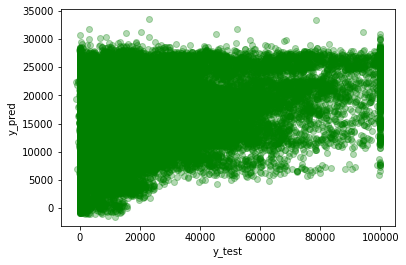

In [63]:
plt.scatter(y_test, y_pred_linear, c='green',alpha=0.3)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [64]:
print(metrics.mean_absolute_error(y_test, clf.predict(X_test))) #Средний модуль отклонения (MAE – Mean Absolute Error или MAD – Mean Absolute Deviation) Mean absolute error regression loss
print(metrics.mean_squared_error(y_test, clf.predict(X_test))) #Средний квадрат отклонения (MSE – Mean Squared Error)
print(np.sqrt(mean_squared_error(y_test, clf.predict(X_test)))) #RMSE – Root Mean Squared Error, коэффициент детерминации (R2)
# оценка качества 

13883.792241962696
376583757.4672392
19405.76608813059


In [65]:
clf = RandomForestRegressor(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_rf=clf.predict(X_test)
acc_rf= round(clf.score(X_train, y_train) * 100, 2)
print ("Accuracy: %i %% \n"%acc_rf)

Accuracy: 99 % 



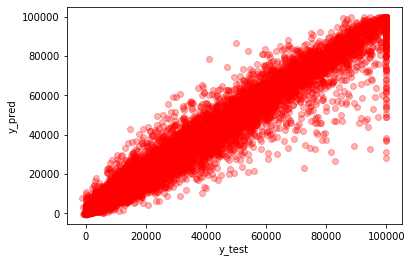

In [66]:
plt.scatter(y_test, y_pred_rf, c='red',alpha=0.3)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [67]:
print(metrics.mean_absolute_error(y_test, clf.predict(X_test)))
print(metrics.mean_squared_error(y_test, clf.predict(X_test))) #Средний квадрат отклонения (MSE – Mean Squared Error)
print(np.sqrt(mean_squared_error(y_test, clf.predict(X_test)))) #RMSE – Root Mean Squared Error, коэффициент детерминации (R2)
# оценка качества 
# оценка качества = НАСКОЛЬКО ПРОДУКТОВ ОШИБАЕМСЯ

1429.5075820250863
9625962.295653021
3102.5734956086085


In [68]:
y_test[:5]

232650    92536.45
4023       6229.80
236346      562.33
177067    50529.15
105158    47794.94
Name: Weekly_Sales, dtype: float64

In [69]:
clf.predict(X_test)[:5]

array([82858.3571,  6876.2634,   912.6464, 54930.0324, 44307.6174])

In [70]:
clf=DecisionTreeRegressor()
clf.fit(X_train, y_train)
y_pred_dt= clf.predict(X_test) #делаем предсказание
acc_dt = round( clf.score(X_train, y_train) * 100, 2)
print (str(acc_dt) + '%')

100.0%


In [71]:
metrics.mean_absolute_error(y_test, clf.predict(X_test))

1890.3701607186883

In [72]:
clf.predict(X_test)[:5]

array([82322.01,  7291.28,  1047.71, 59098.6 , 46501.08])

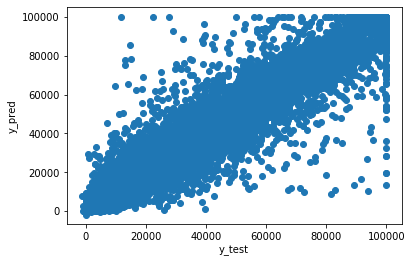

In [73]:
plt.scatter(y_test, y_pred_dt)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [74]:
print(metrics.mean_absolute_error(y_test, clf.predict(X_test)))
print(metrics.mean_squared_error(y_test, clf.predict(X_test))) #Средний квадрат отклонения (MSE – Mean Squared Error)
print(np.sqrt(mean_squared_error(y_test, clf.predict(X_test)))) #RMSE – Root Mean Squared Error, коэффициент детерминации (R2)

1890.3701607186883
18195072.774425898
4265.568282705823


In [75]:
xgb_clf = XGBRegressor(objective='reg:linear', nthread= 4, n_estimators= 500, max_depth= 6, learning_rate= 0.5) 
xb_clf = xgb_clf.fit(X_train, y_train)
y_pred_xgb=xgb_clf.predict(X_test)
acc_xgb= round(xgb_clf.score(X_train, y_train) * 100, 2)
print(str(acc_xgb) + '%')

C:\Users\User\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:36:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
98.48%


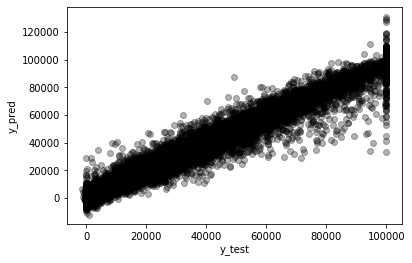

In [76]:
plt.scatter(y_test, y_pred_xgb, c='black',alpha=0.3)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [77]:
print(metrics.mean_absolute_error(y_test, xgb_clf.predict(X_test)))
print(metrics.mean_squared_error(y_test, xgb_clf.predict(X_test))) #Средний квадрат отклонения (MSE – Mean Squared Error)
print(np.sqrt(mean_squared_error(y_test, xgb_clf.predict(X_test)))) #RMSE – Root Mean Squared Error, коэффициент детерминации (R2)

2013.447933452444
11508184.992082732
3392.371588149319


In [78]:
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
clf_knn = KNeighborsRegressor(n_neighbors=10,n_jobs=4)
clf_knn.fit(X_train, y_train)
y_pred_knn = clf_knn.predict(X_test)
acc_knn= round(clf_knn.score(X_train, y_train) * 100, 2)
print(str(acc_knn) + '%')

46.15%


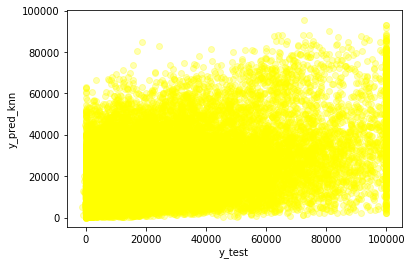

In [79]:
#data.plot(kind="scatter", y_test ="Weight", y = "Height", title = 'Height to Weight scatter plot')
plt.scatter(y_test, y_pred_knn, c='yellow',alpha=0.3)
plt.xlabel("y_test")
plt.ylabel("y_pred_knn")
plt.show()

In [80]:
print(metrics.mean_absolute_error(y_test, clf_knn.predict(X_test)))
print(metrics.mean_squared_error(y_test, clf_knn.predict(X_test))) #Средний квадрат отклонения (MSE – Mean Squared Error)
print(np.sqrt(mean_squared_error(y_test, clf_knn.predict(X_test)))) #RMSE – Root Mean Squared Error, коэффициент детерминации (R2)

10871.34497062993
274538570.2603349
16569.205480660046


### Building models & comparing their RMSE values

### Построение моделей и сравнение их значений RMSE

#### 1.Linear Regression

In [81]:
clf = LinearRegression()
clf.fit(train_X, train_y)
y_pred_linear=clf.predict(test_X)
acc_linear=round( clf.score(train_X, train_y) * 100, 2)
print ('scorbe:'+str(acc_linear) + '%')

scorbe:8.83%


#### 2. Random Forest

In [82]:
clf = RandomForestRegressor(n_estimators=100)
clf.fit(train_X, train_y)
y_pred_rf=clf.predict(test_X)
acc_rf= round(clf.score(train_X, train_y) * 100, 2)
print ("Accuracy: %i %% \n"%acc_rf)

Accuracy: 99 % 



#### 3.Decision Tree

In [83]:
clf=DecisionTreeRegressor()
clf.fit(train_X, train_y)
y_pred_dt= clf.predict(test_X) #делаем предсказание
acc_dt = round( clf.score(train_X, train_y) * 100, 2)
print (str(acc_dt) + '%')

100.0%


#### 4.XGBRegressor

In [84]:
xgb_clf = XGBRegressor(objective='reg:linear', nthread= 4, n_estimators= 500, max_depth= 6, learning_rate= 0.5) 
xb = xgb_clf.fit(train_X,train_y)
y_pred_xgb=xgb_clf.predict(test_X)
acc_xgb= round(xgb_clf.score(train_X, train_y) * 100, 2)
print(str(acc_xgb) + '%')

C:\Users\User\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\User\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[19:42:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
98.46%


#### 5.KNN Regressor

In [85]:
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
clf_knn = KNeighborsRegressor(n_neighbors=10,n_jobs=4)
clf_knn.fit(train_X,train_y)
y_pred = clf_knn.predict(test_X)
acc_knn= round(clf_knn.score(train_X, train_y) * 100, 2)
print(str(acc_knn) + '%')

47.7%


### Comparing Models Сравнение моделей

#### сравним показатель точности всех моделей регрессии, использованных выше.

In [86]:
models = pd.DataFrame({
    'Model': ['Linear Regression','Random Forest','Decision Tree', 'XGBRegressor', 'KNN Regressor'],
    
    'Score': [acc_linear, acc_rf, acc_dt, acc_xgb, acc_knn]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
2,Decision Tree,100.00
1,Random Forest,99.72
3,XGBRegressor,98.46
4,KNN Regressor,47.70
0,Linear Regression,8.83


 ### Predicting Sales value for test data based on highest score model 
  ### Прогнозирование значения продаж для тестовых данных на основе модели с наивысшей оценкой.

In [ ]:
# Prediction value using Random Forest model..Значение прогноза с использованием Random Forest модели 
submission = pd.DataFrame({
        "Store_Dept_Date": test.Store.astype(str)+'_'+test.Dept.astype(str)+'_'+test.Date.astype(str),
        "Weekly_Sales": y_pred_rf
    })

submission.to_csv('weekly_sales predicted.csv', index=False)
submission.to_excel(writer,'Weekly_sales Pred',index=False)

In [ ]:
submission.head()

In [ ]:
#from prettytable import PrettyTable
    
#x = PrettyTable()
#x.field_names = ["Model", "MAE", "RMSE", "Accuracy"]
#x.add_row(["Linear Regression (Baseline)", 14566, 21767, 8.89])
#x.add_row(["KNNRegressor", 8769, 14991, 56.87])
#x.add_row(["DecisionTreeRegressor", 2375, 7490, 96.02])
#x.add_row(["RandomForestRegressor", 1854, 5785, 96.56])
#x.add_row(["ExtraTreeRegressor", 1887, 5684, 96.42])
#x.add_row(["XGBRegressor", 2291, 5205,97.23 ])
#print(x)

In [91]:
#X = train.drop('Weekly_Sales',axis=1).values
#y = train['Weekly_Sales'].values


In [92]:
#X_train, X_val, y_train, y_val = model_selection.train_test_split(X, y, test_size=0.25)

In [93]:
#plt.scatter(y_test, y_pred_rf)
#plt.show()